In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ellipsoid import K_fct_vectorized, ellipsoids_intersect, ellipsoids_intersect_helper

from nalger_helper_functions import *

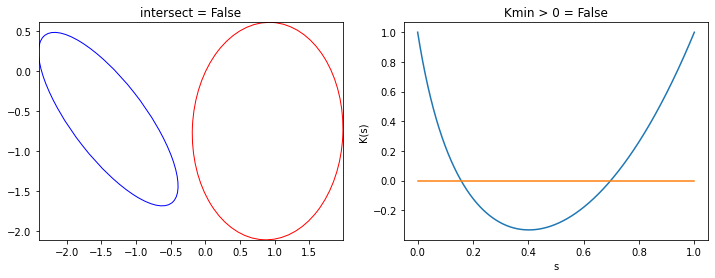

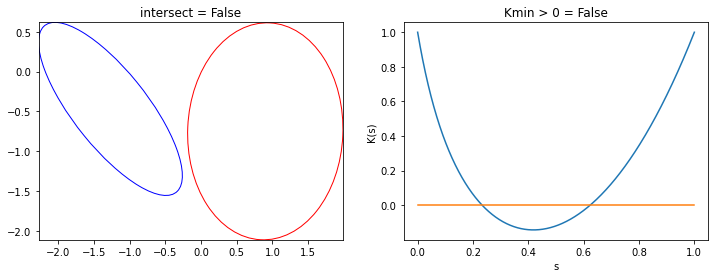

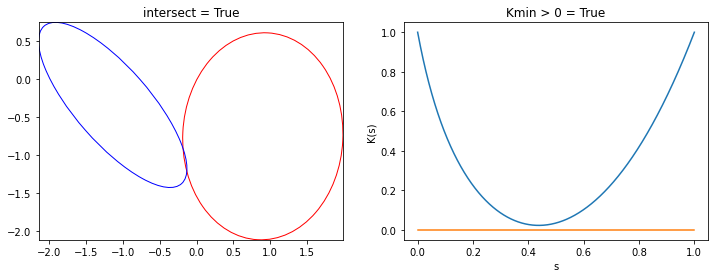

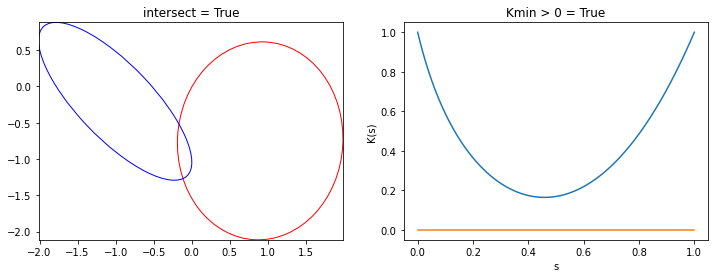

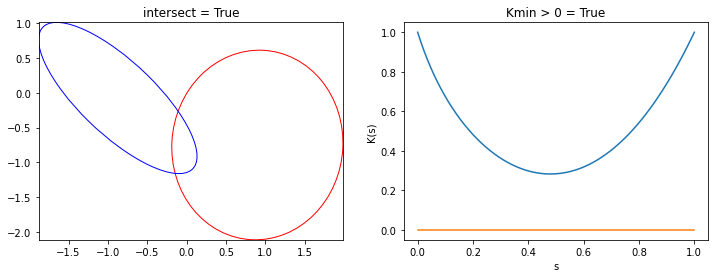

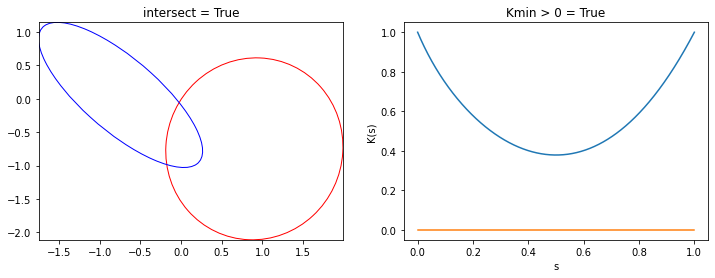

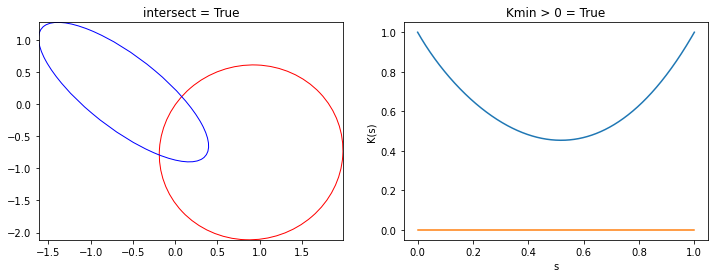

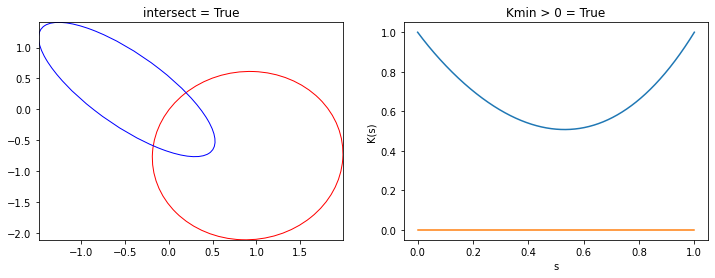

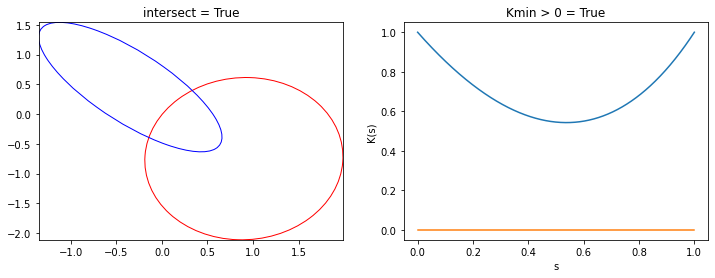

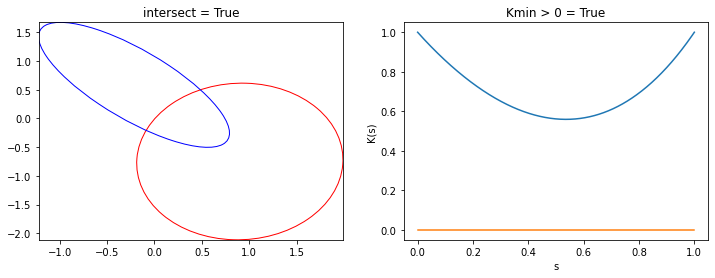

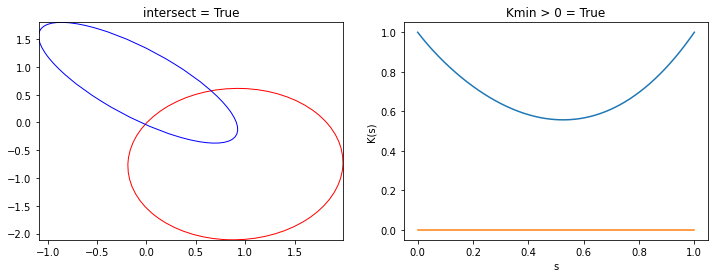

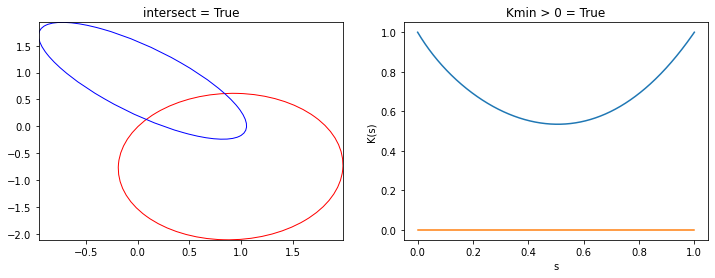

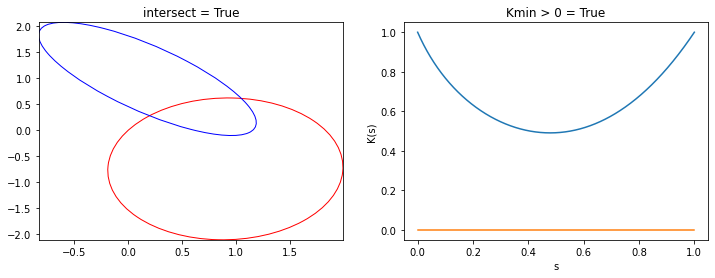

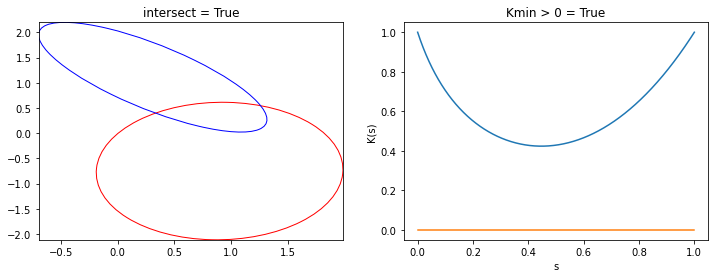

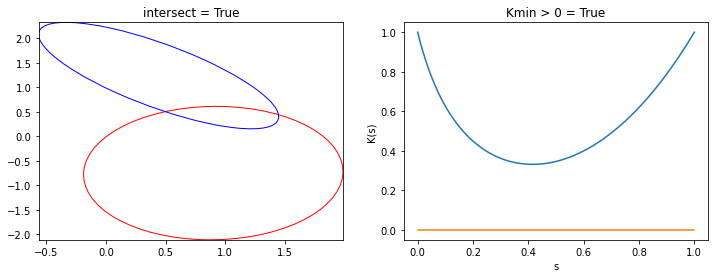

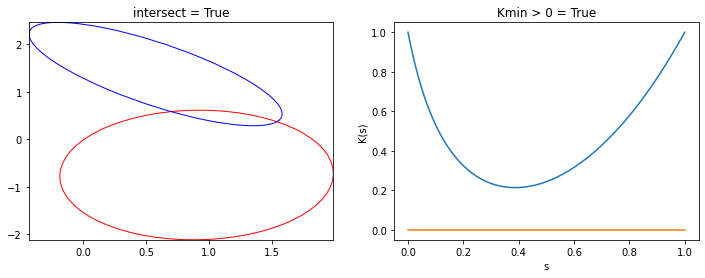

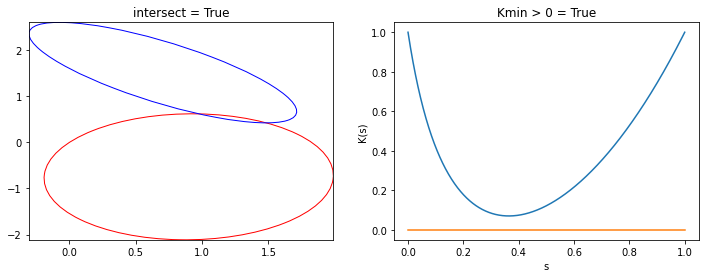

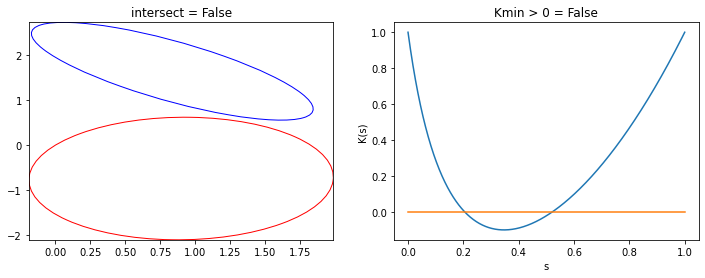

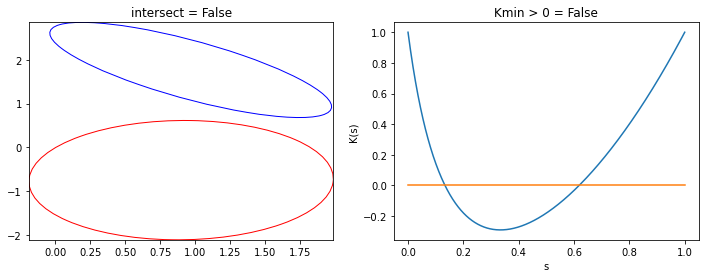

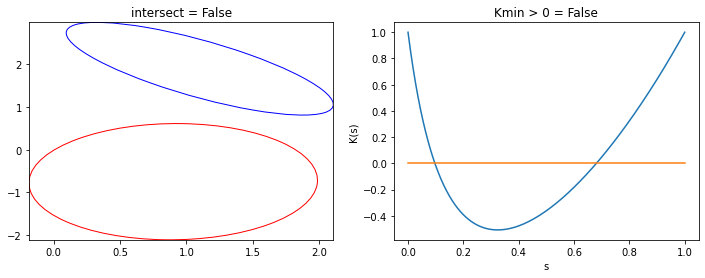

In [2]:
d=2
tau=1.3

Sigma_A = np.array([[0.7, 0.02 ], [0.02, 1.1]])
Sigma_B = np.array([[ 0.6, -0.5], [-0.5, 0.7]])

mu_A = np.array([ 0.9, -0.75])
mu_B0 = np.array([-1.4, -0.6])

dmu = np.array([1.0, 1.0])

tt = np.linspace(0, 2.5, 20)

for ii  in range(len(tt)):
    mu_B = mu_B0 + tt[ii] * dmu

    min_A, max_A = ellipsoid_bounding_box(mu_A, Sigma_A, tau)
    min_B, max_B = ellipsoid_bounding_box(mu_B, Sigma_B, tau)

    min_both = np.min([min_A, min_B], axis=0)
    max_both = np.max([max_A, max_B], axis=0)

    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plot_ellipse(mu_A, Sigma_A, n_std_tau=tau, edgecolor='r')
    plot_ellipse(mu_B, Sigma_B, n_std_tau=tau, edgecolor='b')
    plt.xlim([min_both[0], max_both[0]])
    plt.ylim([min_both[1], max_both[1]])

    intersect = ellipsoids_intersect(Sigma_A, Sigma_B, mu_A, mu_B, tau)
    plt.title('intersect = ' + str(intersect))

    lambdas, Phi, v_squared = ellipsoids_intersect_helper(Sigma_A, Sigma_B, mu_A, mu_B)

    ss = np.linspace(0., 1., 1000)
    KK = K_fct_vectorized(ss, lambdas, v_squared, tau)

    Kmin = np.min(KK)

    plt.subplot(1,2,2)
    plt.plot(ss, KK)
    plt.plot(ss, ss * 0.0)
    plt.title('Kmin > 0 = ' + str(Kmin > 0))
    plt.ylabel('K(s)')
    plt.xlabel('s')